<a href="https://colab.research.google.com/github/Kyllien/DRIM-Game/blob/main/MatriceTransitionGood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre Requis

In [1]:
#Connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [103]:
#Import data from os
import os
os.chdir("/content/gdrive/My Drive/DRIM")

In [3]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 4.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
#Librairie
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import csv

# Mise en place de la base
## Ouverture de la base

In [4]:
data = pd.read_csv('base_1.csv')

# print(np.unique(data['classe'])) #Aucun prob de classe

#rename the columns
data = data.rename(columns={"classe": "State", "dtf_per_trt": "Time", "ID_BCR_TRS": "ID"})
# Put Time in Date Forma
data["Time"]=pd.to_datetime(data["Time"])



## Modification de la base avec une ligne = 1 ID

In [5]:
df=data
df=df.sort_values(by=["Time"])
ID=np.unique(df["ID"])
df2=pd.DataFrame(ID,columns=["ID"])
compteur=0
for i in np.unique(df["Time"]):
  print(i)
  df3=df[df["Time"]==i]
  df3=df3[["ID","State"]]
  df3=df3.rename({'ID': 'ID', 'State': 'Date'+str(compteur)}, axis='columns')
  compteur=compteur+1
  df2=df2.merge(df3,on='ID',how='left')


2010-01-31T00:00:00.000000000
2010-02-28T00:00:00.000000000
2010-03-31T00:00:00.000000000
2010-04-30T00:00:00.000000000
2010-05-31T00:00:00.000000000
2010-06-30T00:00:00.000000000
2010-07-31T00:00:00.000000000
2010-08-31T00:00:00.000000000
2010-09-30T00:00:00.000000000
2010-10-31T00:00:00.000000000
2010-11-30T00:00:00.000000000
2010-12-31T00:00:00.000000000
2011-01-31T00:00:00.000000000
2011-02-28T00:00:00.000000000
2011-03-31T00:00:00.000000000
2011-04-30T00:00:00.000000000
2011-05-31T00:00:00.000000000
2011-06-30T00:00:00.000000000
2011-07-31T00:00:00.000000000
2011-08-31T00:00:00.000000000
2011-09-30T00:00:00.000000000
2011-10-31T00:00:00.000000000
2011-11-30T00:00:00.000000000
2011-12-31T00:00:00.000000000
2012-01-31T00:00:00.000000000
2012-02-29T00:00:00.000000000
2012-03-31T00:00:00.000000000
2012-04-30T00:00:00.000000000
2012-05-31T00:00:00.000000000
2012-06-30T00:00:00.000000000
2012-07-31T00:00:00.000000000
2012-08-31T00:00:00.000000000
2012-09-30T00:00:00.000000000
2012-10-31

## Modif de la base
Creation d'une classe pour les non rating et changement de type pour les cellules

In [6]:
#Creation d'une classe pour les non rating : 12
df3=df2.copy()
df3=df3.fillna(12)

In [7]:
#Changement de type float en int8
def TypeInt (df):
  df2 = df["ID"]
  df = df.drop(columns=["ID"])
  for i in df.columns:
    df2 = pd.concat([df2,pd.to_numeric(df[i],downcast='integer')],axis=1)
  return df2
df3 = TypeInt(df3)
df3.dtypes

ID        object
Date0       int8
Date1       int8
Date2       int8
Date3       int8
           ...  
Date91      int8
Date92      int8
Date93      int8
Date94      int8
Date95      int8
Length: 97, dtype: object

## Mise en place des defauts

In [8]:
# #Mise en place du postulat : une personne qui tombe en défaut reste en défaut
# liste=[]
# for i, row in df3.iterrows():
#   if(row[row==11].empty==False):
#     row[row[row==11].index[0]:]=11
#   liste.append(row.values)
# df4=pd.DataFrame(liste,columns=df3.columns)


In [9]:
#Enregistrement de la base ou chargement


# Creation des Matrices


## Matrice sans prise en compte de la classe NA

In [10]:
#Creation Matrice PIT sans les NR(12)
PIT={}
for i in range(1,96):
  u=df2.columns[i]
  m=df2.columns[i+1]
  PIT[i]=pd.crosstab(df2[u],df2[m],normalize="index",dropna=True)
  for j in range(1,11):
    PIT[i].loc[11,j] = 0
  PIT[i].loc[11,11] = 1

In [11]:
#Creation matrice TTC sans les NR(12)
TTC=PIT[1]
for i in range(2,96):
  TTC=TTC+PIT[i]
TTC=TTC/len(PIT)
TTC

Date1,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
Date0,,,,,,,,,,,
1.0,0.970357,0.014852,0.011744,0.002345,0.000176,0.000383,0.000069,0.000043,0.000023,0.000003,0.000007
2.0,0.025838,0.959496,0.001567,0.002870,0.004158,0.004869,0.001023,0.000079,0.000085,0.000004,0.000010
3.0,0.004818,0.027760,0.955731,0.000341,0.000384,0.004316,0.004964,0.001376,0.000190,0.000101,0.000019
4.0,0.000060,0.013048,0.030364,0.940812,0.000481,0.000699,0.011099,0.000105,0.003089,0.000171,0.000073
5.0,0.000059,0.009819,0.008680,0.022321,0.940846,0.000664,0.012350,0.000420,0.004502,0.000228,0.000113
6.0,0.000074,0.000932,0.014678,0.001824,0.015822,0.940915,0.001811,0.014090,0.006834,0.002751,0.000269
7.0,0.000040,0.000950,0.002507,0.008902,0.009430,0.017109,0.917311,0.001896,0.022824,0.017997,0.001034
8.0,0.000040,0.000387,0.006037,0.001126,0.001179,0.043849,0.036728,0.832132,0.014491,0.060491,0.003540
9.0,0.000041,0.000682,0.001313,0.006178,0.009493,0.024608,0.090554,0.020750,0.707087,0.121018,0.018276


In [12]:
#TTC Cumule sans les NR(12)
TTC_C = TTC
TTC[11][1]
for i in range(1,12):
  compteur=0
  for j in reversed(range(1,12)):
    compteur=TTC[j][i]+compteur
    TTC_C[j][i]=compteur
TTC_C

Date1,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
Date0,,,,,,,,,,,
1.0,1.0,0.029643,0.014791,0.003048,0.000703,0.000527,0.000145,0.000076,0.000033,0.000009,0.000007
2.0,1.0,0.974162,0.014665,0.013098,0.010228,0.006070,0.001202,0.000179,0.000100,0.000014,0.000010
3.0,1.0,0.995182,0.967422,0.011691,0.011350,0.010966,0.006650,0.001686,0.000310,0.000120,0.000019
4.0,1.0,0.999940,0.986892,0.956528,0.015716,0.015236,0.014537,0.003438,0.003333,0.000244,0.000073
5.0,1.0,0.999941,0.990122,0.981442,0.959121,0.018275,0.017611,0.005262,0.004842,0.000340,0.000113
6.0,1.0,0.999926,0.998994,0.984316,0.982491,0.966669,0.025755,0.023943,0.009854,0.003019,0.000269
7.0,1.0,0.999960,0.999010,0.996503,0.987601,0.978171,0.961063,0.043751,0.041855,0.019031,0.001034
8.0,1.0,0.999960,0.999573,0.993536,0.992409,0.991230,0.947381,0.910653,0.078522,0.064030,0.003540
9.0,1.0,0.999959,0.999277,0.997964,0.991786,0.982293,0.957685,0.867131,0.846381,0.139294,0.018276


## Matrice avec les NA

### Matrice PIT mensuel

In [13]:
#Creation Matrice PIT avec les NR(12)
PIT_NR={}
for i in range(1,96):
  u=df3.columns[i]
  m=df3.columns[i+1]
  PIT_NR[i]=pd.crosstab(df3[u],df3[m],normalize="index")
  for j in range(1,13):
    PIT_NR[i].loc[11,j] = 0
  PIT_NR[i].loc[11,11] = 1




In [14]:
PIT_NR[1]

Date1,1,2,3,4,5,6,7,8,9,10,11,12
Date0,,,,,,,,,,,,
1,0.936569,0.000710,0.002334,0.000812,0.000000,0.000025,0.000000,0.000000,0.000025,0.000000,0.000000,0.059524
2,0.019365,0.963849,0.000397,0.001298,0.002019,0.002524,0.000000,0.000000,0.000000,0.000000,0.000000,0.010548
3,0.004233,0.024065,0.949582,0.000191,0.000191,0.003661,0.004805,0.000000,0.000000,0.000000,0.000038,0.013234
4,0.000164,0.015756,0.034138,0.920565,0.000328,0.001149,0.015263,0.000164,0.000000,0.000000,0.000000,0.012473
5,0.000000,0.017369,0.012062,0.011901,0.924091,0.000965,0.022998,0.000643,0.000161,0.000000,0.000000,0.009810
6,0.000000,0.003868,0.020394,0.000820,0.009259,0.915026,0.005391,0.028833,0.003868,0.000000,0.000000,0.012541
7,0.000000,0.000802,0.006950,0.018444,0.018712,0.014167,0.861668,0.003876,0.058808,0.000936,0.000668,0.014969
8,0.000000,0.000000,0.006063,0.000000,0.000933,0.117537,0.030784,0.733209,0.035448,0.062500,0.001399,0.012127
9,0.000000,0.000000,0.000495,0.001486,0.005448,0.015849,0.180287,0.011392,0.596335,0.167410,0.008915,0.012382


### Matrice Mensuel Ajuste

In [15]:
PIT_NR_AJUSTE = {}
for i in range(1,96):
  matrice=[]
  for j in range(0,11):
    matrice2=[]
    for k in range(0,11):
      matrice2.append(PIT_NR[i].iloc[j,k]/(1-PIT_NR[i].iloc[j,11]))
    matrice.append(matrice2)
  PIT_NR_AJUSTE[i]=pd.DataFrame(matrice,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10","D"])

### Matrice PIT Mensuel Ajuste Cumule

In [16]:
PIT_MENS_CUMULE = {}
for i in range(1,85):
  matrice1=[]
  for j in range(0,11):
    matrice2=[PIT_NR_AJUSTE[i].iloc[j,10]]
    compteur=PIT_NR_AJUSTE[i].iloc[j,10]
    for k in reversed(range(0,10)):
      compteur=PIT_NR_AJUSTE[i].iloc[j,k]+compteur
      matrice2.append(compteur)
    matrice1.append(list(reversed(matrice2)))
  PIT_MENS_CUMULE[i]=pd.DataFrame(matrice1,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10","D"])

In [17]:
PIT_MENS_CUMULE[10]

,1,2,3,4,5,6,7,8,9,10,D
1,1.0,0.028034,0.012966,0.003068,0.000778,0.000588,0.000210,0.000210,0.000063,0.000000,0.000000
2,1.0,0.972617,0.010172,0.009219,0.007362,0.004149,0.001389,0.000387,0.000355,0.000032,0.000032
3,1.0,0.995771,0.971167,0.009157,0.009087,0.008982,0.005592,0.001992,0.000769,0.000489,0.000000
4,1.0,1.000000,0.985363,0.953001,0.018128,0.017591,0.017322,0.008594,0.008460,0.000671,0.000134
5,1.0,1.000000,0.981655,0.969141,0.953641,0.021615,0.021331,0.010808,0.010239,0.001706,0.000284
6,1.0,0.999654,0.997922,0.973797,0.972065,0.960291,0.024703,0.023318,0.014429,0.005772,0.000346
7,1.0,0.999863,0.996982,0.989712,0.970370,0.953909,0.939095,0.045542,0.043896,0.025103,0.002195
8,1.0,1.000000,0.998807,0.990453,0.988663,0.986874,0.872912,0.845465,0.082936,0.062649,0.005967
9,1.0,1.000000,0.998640,0.995921,0.987763,0.978246,0.932699,0.762067,0.746431,0.158396,0.033311
10,1.0,1.000000,1.000000,1.000000,1.000000,0.993318,0.974388,0.841871,0.729399,0.595768,0.202673


### Matrice PIT mensuel a horizon 12 mois


Premiere methode en prenant les gens qui sont dans la base a la t et regard sur +12 dans quelle classe ils sont

In [18]:
# PIT_NR_12={}
# for i in range(1,85):
#   u=df4.columns[i]
#   m=df4.columns[i+12]
#   PIT_NR_12[i]=pd.crosstab(df4[u],df4[m],normalize="index")

### Version du Cours pour matrice PIT + 12 mois



In [19]:
PIT_12 = []
for k in range(1,85) :
  matrice = PIT_NR_AJUSTE[k].to_numpy()
  for i in range(1,12) :
    matrice = np.dot(matrice,PIT_NR_AJUSTE[k+i].to_numpy())
  PIT_12.append(matrice)

### Passage du array numpy a un dict en Dataframe

In [20]:
PIT_NR_12_AJUSTE={}
for i in range(1,85) :
  PIT_NR_12_AJUSTE[i]=pd.DataFrame(PIT_12[i-1],columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10","D"])


### Matrice PIT Cumule

In [21]:
PIT_CUMULE = {}
for i in range(1,85):
  matrice1=[]
  for j in range(0,11):
    matrice2=[PIT_NR_12_AJUSTE[i].iloc[j,10]]
    compteur=PIT_NR_12_AJUSTE[i].iloc[j,10]
    for k in reversed(range(0,10)):
      compteur=PIT_NR_12_AJUSTE[i].iloc[j,k]+compteur
      matrice2.append(compteur)
    matrice1.append(list(reversed(matrice2)))
  PIT_CUMULE[i]=pd.DataFrame(matrice1,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10","D"])

In [22]:
# for i in range(1,85):
#   PIT_CUMULE[i].to_excel("PIT_CUMULE"+str(i)+".xlsx")

### Matrice TTC

In [23]:
TTC=PIT_NR_12_AJUSTE[1]
for i in range(2,85):
  TTC=TTC+PIT_NR_12_AJUSTE[i]
TTC=TTC/len(PIT_NR_12_AJUSTE)
TTC

,1,2,3,4,5,6,7,8,9,10,D
1,0.714442,0.140175,0.101071,0.020655,0.005446,0.009543,0.005487,0.001266,0.000865,0.000480,0.000571
2,0.216705,0.627694,0.034832,0.028065,0.033807,0.037852,0.012401,0.003072,0.002560,0.001347,0.001665
3,0.072699,0.214589,0.588227,0.009858,0.013130,0.041969,0.037199,0.009061,0.005021,0.003458,0.004790
4,0.025170,0.125960,0.208922,0.488466,0.012623,0.023945,0.077523,0.006411,0.013666,0.006466,0.010848
5,0.016778,0.091403,0.087883,0.147465,0.490063,0.022960,0.092743,0.008212,0.019174,0.008501,0.014817
6,0.007827,0.032796,0.111443,0.029664,0.106547,0.512937,0.058179,0.059766,0.027811,0.018103,0.034928
7,0.004015,0.021268,0.041969,0.061938,0.069060,0.124504,0.442259,0.038313,0.063290,0.037693,0.095691
8,0.003831,0.016195,0.053508,0.024796,0.041105,0.191927,0.206756,0.177830,0.059241,0.049165,0.175647
9,0.003153,0.016122,0.035388,0.041542,0.054719,0.125529,0.260396,0.073230,0.081720,0.044509,0.263689
10,0.001901,0.009869,0.025549,0.025144,0.033815,0.097347,0.193054,0.068872,0.051315,0.031711,0.461422


### TTC Cumule

In [24]:
matrice1=[]
for j in range(0,11):
  matrice2=[TTC.iloc[j,10]]
  compteur=TTC.iloc[j,10]
  for k in reversed(range(0,10)):
    compteur=TTC.iloc[j,k]+compteur
    matrice2.append(compteur)
  matrice1.append(list(reversed(matrice2)))
TTC_CUMULE=pd.DataFrame(matrice1,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10","D"])
TTC_CUMULE
# TTC_CUMULE.to_excel("TTC_C.xlsx")

,1,2,3,4,5,6,7,8,9,10,D
1,1.0,0.285558,0.145383,0.044312,0.023657,0.018212,0.008669,0.003182,0.001915,0.001051,0.000571
2,1.0,0.783295,0.155601,0.120769,0.092703,0.058897,0.021044,0.008643,0.005571,0.003012,0.001665
3,1.0,0.927301,0.712713,0.124486,0.114628,0.101498,0.059529,0.022330,0.013269,0.008248,0.004790
4,1.0,0.974830,0.848871,0.639949,0.151483,0.138860,0.114915,0.037391,0.030980,0.017315,0.010848
5,1.0,0.983222,0.891818,0.803936,0.656470,0.166408,0.143447,0.050704,0.042492,0.023317,0.014817
6,1.0,0.992173,0.959377,0.847934,0.818271,0.711724,0.198787,0.140609,0.080842,0.053032,0.034928
7,1.0,0.995985,0.974717,0.932748,0.870810,0.801749,0.677246,0.234987,0.196674,0.133384,0.095691
8,1.0,0.996169,0.979974,0.926466,0.901670,0.860565,0.668639,0.461883,0.284053,0.224811,0.175647
9,1.0,0.996847,0.980724,0.945336,0.903794,0.849075,0.723546,0.463149,0.389919,0.308199,0.263689
10,1.0,0.998099,0.988229,0.962680,0.937536,0.903721,0.806374,0.613320,0.544448,0.493133,0.461422


# Taux de Defaut

## Calcul du Taux de Defaut Empirique

In [25]:
DR_annuel =[]
for k in range(0,len(PIT_12)) :
  Defaut = np.transpose(pd.DataFrame(df2.iloc[:,k+1].value_counts()).sort_index(axis = 0, ascending = True).to_numpy())@PIT_12[k]
  Tx_DR = Defaut[0,10]/sum(Defaut[0])
  DR_annuel.append(Tx_DR)
print(DR_annuel)

[0.06323287022978022, 0.06163850915616854, 0.055020306155498334, 0.05298694872363413, 0.05270742873292758, 0.052255358270242275, 0.05203383643749418, 0.05307515934807887, 0.05322927298227999, 0.052821178200599644, 0.05203397155401317, 0.05155556911646777, 0.051427923168377715, 0.05051483915342187, 0.05012161915509601, 0.050277335748037014, 0.05052270642443089, 0.050769485380956846, 0.051108496098072685, 0.051472697040830705, 0.04624229476742066, 0.04629618920621155, 0.045952950828409396, 0.04602435215719956, 0.04625741426099205, 0.04587786972051637, 0.047663484919776955, 0.04773957703420087, 0.045190382106238235, 0.04612580834628971, 0.04711376918698887, 0.04763403948925948, 0.04834609527132462, 0.04806448765771673, 0.04903350385265545, 0.04981139402638576, 0.050965913004418065, 0.051381294215087275, 0.04915510588925234, 0.048761791814939365, 0.05008796849177048, 0.05095811996021929, 0.0514475818957455, 0.0527534957955137, 0.05312836862047044, 0.053669009560608626, 0.05494222859699939,

## Comparaison avec le taux de defaut historique

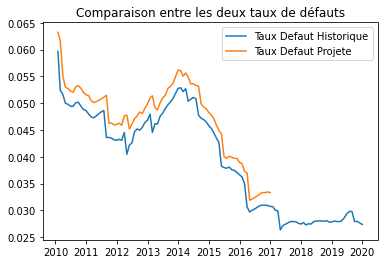

In [26]:
DR_Histo = pd.read_excel("DR_Histo.xlsx")
DR_Histo=pd.concat([DR_Histo,pd.DataFrame(DR_annuel)],axis=1)
DR_Histo.columns=["Date","Taux_Defaut_Historique","Taux_Defaut_Projete"]
plt.plot(DR_Histo["Date"],DR_Histo["Taux_Defaut_Historique"])
plt.plot(DR_Histo["Date"],DR_Histo["Taux_Defaut_Projete"])
plt.legend(["Taux Defaut Historique","Taux Defaut Projete"])
plt.title("Comparaison entre les deux taux de défauts")
plt.show()


## Mise en place d'un AR pour le taux de defaut projete

In [27]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf

pacf = plot_pacf(DR_annuel, lags=10)
ar_model = AutoReg(DR_annuel, lags=1).fit()
pred = ar_model.predict(start=0, end=len(DR_annuel)-1, dynamic=False)

DR_Histo=pd.concat([DR_Histo,pd.DataFrame(pred)],axis=1)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ImportError: ignored

## Exportation du taux de defaut projete

In [ ]:
DR_Histo.columns=["Date","Taux_Defaut_Historique","Taux_Defaut_Projete","AR"]
#DR_Histo.to_excel("Taux_Defaut_Projet.xlsx")

# Modele Satellite ML

In [ ]:
DR_Histo.head(85)

,Date,Taux_Defaut_Historique,Taux_Defaut_Projete,AR
0,2010-01-31,0.059661,0.063233,NaN
1,2010-02-28,0.052415,0.061639,0.062451
2,2010-03-31,0.051614,0.055020,0.060900
3,2010-04-30,0.049995,0.052987,0.054460
4,2010-05-31,0.049792,0.052707,0.052481
...,...,...,...,...
80,2016-09-30,0.030966,0.033329,0.033119
81,2016-10-31,0.030967,0.033316,0.033354
82,2016-11-30,0.030922,0.033445,0.033341
83,2016-12-31,0.030736,0.033321,0.033466


In [ ]:
base_diff = pd.read_excel("base_diff4.xlsx")
m=[0]
m.extend(DR_annuel)
base_diff = pd.concat([base_diff,pd.DataFrame(m)],axis=1)
X_train = base_diff.iloc[1:84,3:]
X_test = base_diff.iloc[84:,3:]
y_train = DR_Histo["Taux_Defaut_Projete"].iloc[1:84,]
y_test = DR_Histo["Taux_Defaut_Historique"].iloc[84:,]

In [ ]:
X_test.iloc[:1,:]

,Tx_Chomage_M,Ita_coin,B_T_Climate,LCI,Tx_IPC,Tx_interet_CT,Tx_interet_LT,Confiance_conso,Confiance_ent,Ind_Inc_Pol_Eco,Qt_Euribor1,Qt_Euribor2,Qt_FTSE,Qt_Enel,Qt_Eni,Qt_Exor,Qt_Generali,Tx_I_Deposits_E,Qt_Cours_actions,Tx_I_Loans,Tx_Bond_Yields_10,USD_euro_change,Tx_Pret_Menage,Tx_Pret_SNF,BOP_Compte_Courant,BOP_Biens,BOP_Services,BOP_Capital,Qt_GT_Pret_bancaire,Qt_GT_credit_conso,Qt_GT_credit_immo,Qt_GT_taux_interet,Tx_bons_tresor,Qt_VIX,Qt_Telecom_ita,Qt_IXIC_NASDAQ,Tx_Deposit_Resident,Tx_Interet_Deposit,Tx_Interet_Deposit_Over,Tx_Interet_Loans_House,Tx_Interet_Loans_Othe,Tx_Bon_Tresor_3,Tx_Bon_Tresor_5,Tx_Bon_Tresor_10,Tx_Bon_Tresor_30,Qt_M1,Qt_M2,Qt_M3,Tx_Fund_Raised,Tx_Refinancing,Tx_Debt_Securities,Tx_Total_Deposit,Tx_Loans_Other,Tx_Loans_Household,Tx_Loans_NonFinancial,Tx_Debt_CB,Qt_Debt_Monetary,Qt_Debt_Financial,Qt_Debt_Resident,Qt_Debt_NonResident,Qt_Debt_Gross,Qt_Stock_Gov,0
84,10.9,0.51,1.8,1.6314,0.897308,-0.3279,1.794,1.36789,0.9359,-9.9475,-1.579638e-13,0.0001,0.234638,0.279496,0.019237,0.389205,0.080147,0.3832,0.187019,1.8966,1.794,-0.4,2.77,0.15,-190.624,-195.641,-127.581,-592.58,-0.204794,3.0,1.098612,0.498991,-0.407,0.121575,-0.091895,0.277626,3.64,0.3832,0.064,1.8966,1.5042,-0.01832,0.52223,1.79452,3.05699,0.08635,0.014735,0.054188,0.44,23.23,-16.1,-2.2,1.79,2.77,0.15,15.621631,-0.075223,-0.0497,-0.078643,0.00314,0.014763,0.014225,0.033321


## LSTM Multivariate

## Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

prediction=[]
for i in range(0:36):
  reg = GradientBoostingRegressor(random_state=0,max_depth=7,n_estimators=500,learning_rate=0.01)
  reg.fit(X_train, y_train)
  X_test2 = X_test.iloc[i,:]
  prediction.append(reg.predict(X_test2))
  X_test.iloc[]
reg.score(X_test,y_test)

In [ ]:
X_train.head(10)

,Tx_Chomage_M,Ita_coin,B_T_Climate,LCI,Tx_IPC,Tx_interet_CT,Tx_interet_LT,Confiance_conso,Confiance_ent,Ind_Inc_Pol_Eco,Qt_Euribor1,Qt_Euribor2,Qt_FTSE,Qt_Enel,Qt_Eni,Qt_Exor,Qt_Generali,Tx_I_Deposits_E,Qt_Cours_actions,Tx_I_Loans,Tx_Bond_Yields_10,USD_euro_change,Tx_Pret_Menage,Tx_Pret_SNF,BOP_Compte_Courant,BOP_Biens,BOP_Services,BOP_Capital,Qt_GT_Pret_bancaire,Qt_GT_credit_conso,Qt_GT_credit_immo,Qt_GT_taux_interet,Tx_bons_tresor,Qt_VIX,Qt_Telecom_ita,Qt_IXIC_NASDAQ,Tx_Deposit_Resident,Tx_Interet_Deposit,Tx_Interet_Deposit_Over,Tx_Interet_Loans_House,Tx_Interet_Loans_Othe,Tx_Bon_Tresor_3,Tx_Bon_Tresor_5,Tx_Bon_Tresor_10,Tx_Bon_Tresor_30,Qt_M1,Qt_M2,Qt_M3,Tx_Fund_Raised,Tx_Refinancing,Tx_Debt_Securities,Tx_Total_Deposit,Tx_Loans_Other,Tx_Loans_Household,Tx_Loans_NonFinancial,Tx_Debt_CB,Qt_Debt_Monetary,Qt_Debt_Financial,Qt_Debt_Resident,Qt_Debt_NonResident,Qt_Debt_Gross,Qt_Stock_Gov,0
1,8.2,-0.31,0.5,2.17620,2.149892,0.954378,4.7290,-1.90246,1.83880,-2.99007,-0.004945,-0.006877,0.064258,0.080883,0.064274,0.681010,-0.016339,0.6887,0.057805,3.1521,4.7290,1.6,4.95,4.31,-89.288,-60.398,-113.778,84.163,3.555348,7.000000,0.510826,-0.405465,2.067,-0.060785,0.134551,0.217568,-1.49,0.6887,0.3506,3.1521,2.6762,3.14192,3.79521,4.72908,5.44670,-0.010860,-0.003804,-0.063752,3.45,72.89,-1.55,3.66,4.80,4.95,4.31,3.6,0.032003,0.094616,0.005634,-0.057588,0.041510,0.050869,0.063233
2,8.1,-0.25,-1.5,2.03560,2.378788,1.086700,4.7356,-1.82329,1.58746,0.69431,-0.006261,-0.009682,-0.050286,0.075389,0.000577,0.523651,-0.150967,0.7070,-0.012261,3.0837,4.7356,1.1,5.03,4.76,-1907.868,-2333.357,279.900,50.717,-2.397895,8.938045,-0.233615,0.530628,1.862,0.008491,0.073206,0.148217,-0.83,0.7070,0.3682,3.0837,2.7944,3.10664,3.78788,4.73561,5.48680,-0.012499,-0.002596,-0.068509,3.62,42.06,0.46,4.55,4.88,5.03,4.76,3.6,0.003992,0.085767,0.022600,-0.045348,0.035264,0.043545,0.061639
3,8.1,-0.39,0.0,1.81580,2.486475,1.175500,4.8754,-1.81957,1.27400,-6.95678,-0.007640,-0.009074,0.038908,0.197180,0.068202,0.563525,0.014317,0.7519,-0.015037,2.9876,4.8754,1.2,5.07,4.78,-1849.013,-1611.747,202.687,-141.524,-0.566395,-13.143368,2.302585,0.405465,2.098,-0.402069,0.020752,0.154900,-0.47,0.7519,0.3991,2.9876,2.8853,3.10709,3.83162,4.87539,5.59672,-0.018676,-0.008041,-0.072321,3.73,45.73,2.65,5.34,4.62,5.07,4.78,3.7,-0.019803,0.166448,0.011300,-0.055570,0.038941,0.049900,0.055020
4,8.0,-0.65,-0.7,1.51370,2.620215,1.321200,4.8410,-1.53958,0.86870,23.34467,-0.007432,-0.007954,0.077068,0.244768,0.091715,0.544992,0.017911,0.7774,0.090393,3.0361,4.8410,1.0,5.27,4.45,350.235,0.682,228.974,-154.638,0.318454,11.299642,0.000000,-0.719123,1.980,-0.730312,0.146112,0.228094,-0.39,0.7774,0.4318,3.0361,2.9904,3.34358,3.88954,4.84077,5.58547,-0.034775,-0.019623,-0.088912,3.96,60.98,3.11,5.98,4.22,5.27,4.45,3.7,-0.031253,0.106863,0.017094,-0.030615,0.034508,0.042511,0.052987
5,8.3,-0.59,-1.8,1.10150,2.646848,1.425100,4.7560,-1.16489,0.44870,-63.11130,-0.008158,-0.008373,0.044322,0.255064,0.071141,0.437768,0.008282,0.8558,0.037234,3.0888,4.7560,1.2,5.21,4.99,2222.090,1681.557,71.815,-330.961,-0.579818,6.809750,1.203973,0.200671,2.106,-0.737546,0.108431,0.273790,-1.33,0.8558,0.4781,3.0888,2.9604,3.39285,3.94172,4.75615,5.51379,-0.029164,-0.013892,-0.026607,2.40,8.57,4.57,5.83,4.35,5.21,4.99,3.6,-0.023257,0.055959,0.022728,-0.020673,0.039768,0.047180,0.052707
6,8.3,-0.37,-4.6,0.55990,2.746991,1.488600,4.8156,-1.10910,-0.01160,-18.82574,-0.006989,-0.006588,-0.131369,0.064870,-0.033045,0.314887,-0.153504,0.8773,-0.024386,3.1637,4.8156,0.9,5.01,5.18,-426.088,-443.805,506.294,-271.370,-2.564949,1.066825,2.302585,-0.245122,2.147,0.071826,-0.052458,0.200901,-0.93,0.8773,0.4963,3.1637,3.1811,3.47863,4.03454,4.81559,5.58536,-0.024623,-0.010534,-0.019825,2.95,16.56,5.00,8.01,4.53,5.01,5.18,3.7,0.000000,0.103900,0.022728,-0.057158,0.037558,0.044655,0.052255
7,8.4,-0.31,-5.4,-0.11440,2.679657,1.533432,5.4630,-1.31295,-0.43380,61.82225,-0.006529,-0.004451,-0.237463,-0.100644,-0.112691,0.136195,-0.1260

## Random Forest

Choix du meilleur modele :

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import warnings; warnings.simplefilter('ignore')

n_estimators = [1000,1500,2000,4000]
max_depth = [50, 100, 200, 300]
min_samples_split = [0.1, 0.05, 0.03]
learning_rate = [1,0.5,0.2,0.1,0.01,0.001]
class_weight=[None,"balanced"]

parameters = {'n_estimators': n_estimators ,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'learning_rate' : learning_rate
              #'class_weight' : class_weight
}

RF = GradientBoostingRegressor()

clf = GridSearchCV(RF, parameters, scoring="r2", cv=5)
clf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [1, 0.5, 0.2, 0.1, 0.01, 0.001],
                         'max_depth': [50, 100, 200, 300],
                         'min_samples_split': [0.1, 0.05, 0.03],
                         'n_estimators': [1000, 1500, 2000, 4000]},
             scoring='r2')

In [ ]:
gridsearch_result = pd.DataFrame(clf.cv_results_["params"])
gridsearch_result["score"] = clf.cv_results_["mean_test_score"]
gridsearch_result[["n_estimators","max_depth","score"]].groupby(["n_estimators","max_depth"]).mean().unstack()

score                                        
max_depth           5         10        20        30        50
n_estimators                                                  
5            -4.239650 -3.860594 -4.089119 -4.314542 -3.968867
10           -3.431904 -2.760949 -2.958957 -2.971186 -2.994310
20           -2.598478 -2.162281 -2.280071 -2.122326 -2.049721
40           -2.108826 -1.910504 -1.968313 -1.941390 -2.001653
50           -2.112921 -1.915725 -2.224546 -1.806069 -1.781294
80           -2.009207 -1.622492 -1.894801 -1.837495 -1.745001
100          -1.941819 -1.895729 -1.894047 -1.954595 -1.614762
150          -1.920376 -1.975340 -2.026849 -1.843031 -1.875379
200          -1.987025 -1.789461 -2.042699 -1.997271 -1.804620
400          -2.034229 -1.742850 -1.865483 -1.870028 -1.942078

In [ ]:
clf.best_score_

-1.0752618580245712

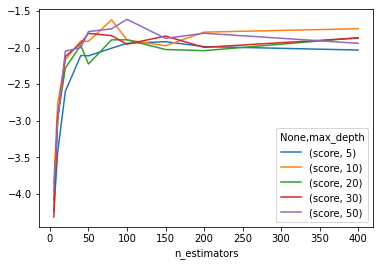

In [ ]:
gridsearch_result[["n_estimators","max_depth","score"]].groupby(["n_estimators","max_depth"]).mean().unstack().plot()


# Methode alternative : Modelisation pour chaque cellule matrice PIT cumulée

## Mise en Data des Cellules de chaque PIT Cumule
Pour permettre la production de la méthode alternative

In [33]:
Data_Cellule = {}
dates = pd.date_range(start='20100130',freq="M",periods=84)
for i in range(0,10) :
  matrice=[]
  for j in range(0,11):
    liste=[]
    for k in range(1,85):
      liste.append(PIT_CUMULE[k].iloc[i,j])
    matrice.append(liste)
  Data_Cellule["Classe_"+str(i+1)]=pd.DataFrame(np.transpose(matrice), columns=["1","2","3","4","5","6","7","8","9","10","D"],index=dates)


In [34]:
Data_Cellule["Classe_1"]

,1,2,3,4,5,6,7,8,9,10,D
2010-01-31,1.0,0.230486,0.115205,0.038087,0.019877,0.015677,0.009059,0.004415,0.002459,0.001322,0.000778
2010-02-28,1.0,0.249680,0.122844,0.040507,0.021593,0.016835,0.009551,0.004528,0.002699,0.001566,0.000896
2010-03-31,1.0,0.266746,0.130466,0.044050,0.024235,0.018742,0.010693,0.004787,0.002947,0.001748,0.001100
2010-04-30,1.0,0.284760,0.137417,0.046228,0.025545,0.019369,0.010623,0.004455,0.002802,0.001771,0.001095
2010-05-31,1.0,0.284954,0.139810,0.046665,0.025431,0.019273,0.010851,0.004561,0.002879,0.001754,0.001120
...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31,1.0,0.298029,0.151734,0.043291,0.021159,0.016188,0.006798,0.002006,0.001082,0.000512,0.000210
2016-09-30,1.0,0.295590,0.150208,0.043403,0.021329,0.016398,0.006939,0.002128,0.001155,0.000552,0.000248
2016-10-31,1.0,0.295836,0.150024,0.043751,0.021875,0.016762,0.007109,0.002221,0.001221,0.000579,0.000262
2016-11-30,1.0,0.299075,0.151262,0.044017,0.022107,0.016986,0.007178,0.002242,0.001224,0.000591,0.000262


## Exportation des donnée 

In [37]:
# vecteur=["Classe_1","Classe_2","Classe_3","Classe_4","Classe_5","Classe_6","Classe_7","Classe_8","Classe_9","Classe_10"]
# for i in vecteur:
#   Data_Cellule[i].to_excel("Cellule_PIT_Cumule/Cellule_"+str(i)+".xlsx")

## Tests et Creation PIT Cumule predite en fonction des differentes methodes

### AdaLasso

Recuperation de chaque tableau de chaque classe (chaque ligne)

In [114]:
AdaLasso = {}
for i in range(1,11):
  AdaLasso[i] = pd.read_excel("Prediction Cellule/PredictionCellule_AdaLasso.xlsx",sheet_name="Classe"+str(i))
  AdaLasso[i].drop(columns="Unnamed: 0",inplace=True)

Mise en place des PIT Cumule

In [115]:
PIT_Cumule_AdaLasso = {}
mo = pd.DataFrame([1,1,1,1,1,1,1,1,1,1],index=["1","2","3","4","5","6","7","8","9","10"])
for i in range(0,37):
  liste=[]
  for j in range(1,11):
    liste.append(AdaLasso[j].iloc[i,:])
  PIT_Cumule_AdaLasso[i]=mo.merge(pd.DataFrame(liste,index=["1","2","3","4","5","6","7","8","9","10"]),left_index=True,right_index=True)
  PIT_Cumule_AdaLasso[i].rename(columns={0:'1','Ligne_1':'2','Ligne_2':'3','Ligne_3':'4','Ligne_4':'5','Ligne_5':'6','Ligne_6':'7','Ligne_7':'8','Ligne_8':'9','Ligne_9':'10','Ligne_10':'11'},inplace=True)

Comparaison et test sur la premiere matrice predite et la derniere matrice projete, pour avoir le niveaux d'erreur du modele

In [116]:
import sklearn.metrics as me
import math

listeAda=[]
for i in range(1,11):
  for j in range(0,10):
    listeAda.append(PIT_Cumule_AdaLasso[0].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[84].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeAda))
print("MAE : ",me.mean_absolute_error(listePIT,listeAda))
print("MSE : ",me.mean_squared_error(listePIT,listeAda))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeAda)))

MAPE :  0.04758055500105585
MAE :  0.005039786770517105
MSE :  5.3743555380476306e-05
RMSE :  0.007330999616728697


Passage Des Cumules au PIT Normal

In [117]:
PIT_AdaLasso = {}
for i in range(0,37):
  liste=[]
  for j in range(0,10):
    compteur=[]
    for k in range(0,10):
      compteur.append(PIT_Cumule_AdaLasso[i].iloc[j,k]-PIT_Cumule_AdaLasso[i].iloc[j,k+1])
    compteur.append(PIT_Cumule_AdaLasso[i].iloc[j,10])
    liste.append(compteur)
  PIT_AdaLasso[i]=pd.DataFrame(liste,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10"])
  


Exportation des données :

In [119]:
for i in range(0,37):
  PIT_AdaLasso[i].to_excel("Prediction Cellule/AdaLasso/PIT_Adalasso"+str(i)+".xlsx")

### MSAENET

In [51]:
Msaenet = {}
for i in range(1,11):
  Msaenet[i] = pd.read_excel("Prediction Cellule/PredictionCellule_MSAENET.xlsx",sheet_name="Classe"+str(i))
  Msaenet[i].drop(columns="Unnamed: 0",inplace=True)

PIT_Cumule_Msaenet = {}
mo = pd.DataFrame([1,1,1,1,1,1,1,1,1,1],index=["1","2","3","4","5","6","7","8","9","10"])
for i in range(0,37):
  liste=[]
  for j in range(1,11):
    liste.append(Msaenet[j].iloc[i,:])
  PIT_Cumule_Msaenet[i]=mo.merge(pd.DataFrame(liste,index=["1","2","3","4","5","6","7","8","9","10"]),left_index=True,right_index=True)
  PIT_Cumule_Msaenet[i].rename(columns={0:'1','Ligne_1':'2','Ligne_2':'3','Ligne_3':'4','Ligne_4':'5','Ligne_5':'6','Ligne_6':'7','Ligne_7':'8','Ligne_8':'9','Ligne_9':'10','Ligne_10':'11'},inplace=True)

import sklearn.metrics as me
import math

listeMsa=[]
for i in range(1,11):
  for j in range(0,10):
    listeMsa.append(PIT_Cumule_Msaenet[0].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[84].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeMsa))
print("MAE : ",me.mean_absolute_error(listePIT,listeMsa))
print("MSE : ",me.mean_squared_error(listePIT,listeMsa))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeMsa)))

PIT_Msaenet = {}
for i in range(0,37):
  liste=[]
  for j in range(0,10):
    compteur=[]
    for k in range(0,10):
      compteur.append(PIT_Cumule_Msaenet[i].iloc[j,k]-PIT_Cumule_Msaenet[i].iloc[j,k+1])
    compteur.append(PIT_Cumule_Msaenet[i].iloc[j,10])
    liste.append(compteur)
  PIT_Msaenet[i]=pd.DataFrame(liste,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10"])


MAPE :  0.05350575247540987
MAE :  0.005731586008420033
MSE :  6.744298306815863e-05
RMSE :  0.008212367689537446


In [52]:
for i in range(0,37):
  PIT_Msaenet[i].to_excel("Prediction Cellule/Msaenet/PIT_Msaenet"+str(i)+".xlsx")

### Ridge

In [108]:
Ridge = {}
for i in range(1,11):
  Ridge[i] = pd.read_excel("Prediction Cellule/PredictionCellule_Ridge.xlsx",sheet_name="Classe"+str(i))
  Ridge[i].drop(columns="Unnamed: 0",inplace=True)

PIT_Cumule_Ridge = {}
mo = pd.DataFrame([1,1,1,1,1,1,1,1,1,1],index=["1","2","3","4","5","6","7","8","9","10"])
for i in range(0,37):
  liste=[]
  for j in range(1,11):
    liste.append(Ridge[j].iloc[i,:])
  PIT_Cumule_Ridge[i]=mo.merge(pd.DataFrame(liste,index=["1","2","3","4","5","6","7","8","9","10"]),left_index=True,right_index=True)
  PIT_Cumule_Ridge[i].rename(columns={0:'1','Ligne_1':'2','Ligne_2':'3','Ligne_3':'4','Ligne_4':'5','Ligne_5':'6','Ligne_6':'7','Ligne_7':'8','Ligne_8':'9','Ligne_9':'10','Ligne_10':'11'},inplace=True)

import sklearn.metrics as me
import math

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Cumule_Ridge[0].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[84].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

PIT_Ridge = {}
for i in range(0,37):
  liste=[]
  for j in range(0,10):
    compteur=[]
    for k in range(0,10):
      compteur.append(PIT_Cumule_Ridge[i].iloc[j,k]-PIT_Cumule_Ridge[i].iloc[j,k+1])
    compteur.append(PIT_Cumule_Ridge[i].iloc[j,10])
    liste.append(compteur)
  PIT_Ridge[i]=pd.DataFrame(liste,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10"])

MAPE :  0.04738000883634036
MAE :  0.004838735751378318
MSE :  4.490088135886635e-05
RMSE :  0.006700811992502577


In [ ]:
for i in range(0,37):
  PIT_Ridge[i].to_excel("Prediction Cellule/Ridge/PIT_Ridge"+str(i)+".xlsx")

### Lasso

In [110]:
Lasso = {}
for i in range(1,11):
  Lasso[i] = pd.read_excel("Prediction Cellule/PredictionCellule_Lasso.xlsx",sheet_name="Classe"+str(i))
  Lasso[i].drop(columns="Unnamed: 0",inplace=True)

PIT_Cumule_Lasso = {}
mo = pd.DataFrame([1,1,1,1,1,1,1,1,1,1],index=["1","2","3","4","5","6","7","8","9","10"])
for i in range(0,37):
  liste=[]
  for j in range(1,11):
    liste.append(Lasso[j].iloc[i,:])
  PIT_Cumule_Lasso[i]=mo.merge(pd.DataFrame(liste,index=["1","2","3","4","5","6","7","8","9","10"]),left_index=True,right_index=True)
  PIT_Cumule_Lasso[i].rename(columns={0:'1','Ligne_1':'2','Ligne_2':'3','Ligne_3':'4','Ligne_4':'5','Ligne_5':'6','Ligne_6':'7','Ligne_7':'8','Ligne_8':'9','Ligne_9':'10','Ligne_10':'11'},inplace=True)

import sklearn.metrics as me
import math

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Cumule_Lasso[0].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[84].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

PIT_Lasso = {}
for i in range(0,37):
  liste=[]
  for j in range(0,10):
    compteur=[]
    for k in range(0,10):
      compteur.append(PIT_Cumule_Lasso[i].iloc[j,k]-PIT_Cumule_Lasso[i].iloc[j,k+1])
    compteur.append(PIT_Cumule_Lasso[i].iloc[j,10])
    liste.append(compteur)
  PIT_Lasso[i]=pd.DataFrame(liste,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10"])

MAPE :  0.07494660314289318
MAE :  0.004668537807553419
MSE :  4.939838434434644e-05
RMSE :  0.007028398419579416


In [111]:
for i in range(0,37):
  PIT_Lasso[i].to_excel("Prediction Cellule/Lasso/PIT_Lasso"+str(i)+".xlsx")

### Elastic

In [112]:
Elastic = {}
for i in range(1,11):
  Elastic[i] = pd.read_excel("Prediction Cellule/PredictionCellule_Elastic.xlsx",sheet_name="Classe"+str(i))
  Elastic[i].drop(columns="Unnamed: 0",inplace=True)

PIT_Cumule_Elastic = {}
mo = pd.DataFrame([1,1,1,1,1,1,1,1,1,1],index=["1","2","3","4","5","6","7","8","9","10"])
for i in range(0,37):
  liste=[]
  for j in range(1,11):
    liste.append(Elastic[j].iloc[i,:])
  PIT_Cumule_Elastic[i]=mo.merge(pd.DataFrame(liste,index=["1","2","3","4","5","6","7","8","9","10"]),left_index=True,right_index=True)
  PIT_Cumule_Elastic[i].rename(columns={0:'1','Ligne_1':'2','Ligne_2':'3','Ligne_3':'4','Ligne_4':'5','Ligne_5':'6','Ligne_6':'7','Ligne_7':'8','Ligne_8':'9','Ligne_9':'10','Ligne_10':'11'},inplace=True)

import sklearn.metrics as me
import math

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Cumule_Elastic[0].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[84].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

PIT_Elastic = {}
for i in range(0,37):
  liste=[]
  for j in range(0,10):
    compteur=[]
    for k in range(0,10):
      compteur.append(PIT_Cumule_Elastic[i].iloc[j,k]-PIT_Cumule_Elastic[i].iloc[j,k+1])
    compteur.append(PIT_Cumule_Elastic[i].iloc[j,10])
    liste.append(compteur)
  PIT_Elastic[i]=pd.DataFrame(liste,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10"])

MAPE :  0.07009891034079035
MAE :  0.004825122934836229
MSE :  4.920383208076366e-05
RMSE :  0.007014544324527692


In [113]:
for i in range(0,37):
  PIT_Elastic[i].to_excel("Prediction Cellule/Elastic/PIT_Elastic"+str(i)+".xlsx")

# Methode alternative : Credit Index